# Fraud Detection

Objective:
    This project aims to develop a machine learning model to identify and predict fraudulent transactions.

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information 
for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information 
for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific 
dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts 
and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and 
flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

<a id='import_packages'></a>
## 1. Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 2 Data Import 

In [2]:
raw_data = pd.read_csv(r"C:\Users\hiten\Downloads\Fraud.csv")
raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [75]:
raw_data.shape

(6362620, 11)

As we can see there are 6362620 Rows and 11 Columns

<a id='Statistical_Summary'></a>
## 3.2 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

In [4]:
raw_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<a id='Missing_Data_Treatment'></a>
## 3.3. Missing Data Treatment
If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.


In [5]:
raw_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As we can see there are no Missing Values

<a id='Outliears'></a>
## 3.4 Outlier Treatment

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'step'),
  Text(1, 0, 'amount'),
  Text(2, 0, 'oldbalanceOrg'),
  Text(3, 0, 'newbalanceOrig'),
  Text(4, 0, 'oldbalanceDest'),
  Text(5, 0, 'newbalanceDest'),
  Text(6, 0, 'isFraud'),
  Text(7, 0, 'isFlaggedFraud')])

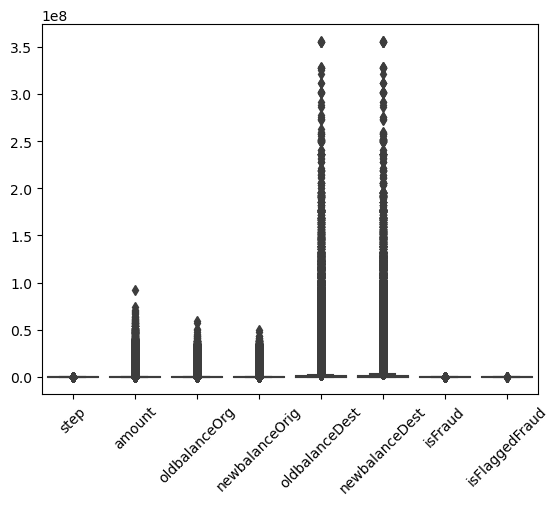

In [6]:
sns.boxplot(data = raw_data)
plt.xticks(rotation = 45)

In [11]:
for i in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    q1 = raw_data[i].quantile(0.25)
    q3 = raw_data[i].quantile(0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr
    raw_data[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

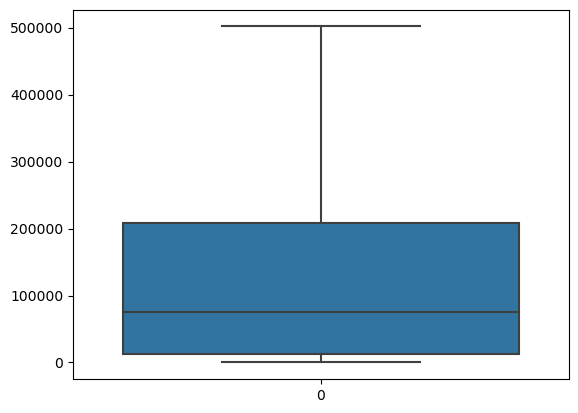

In [12]:
sns.boxplot(data= raw_data.amount)

<Axes: >

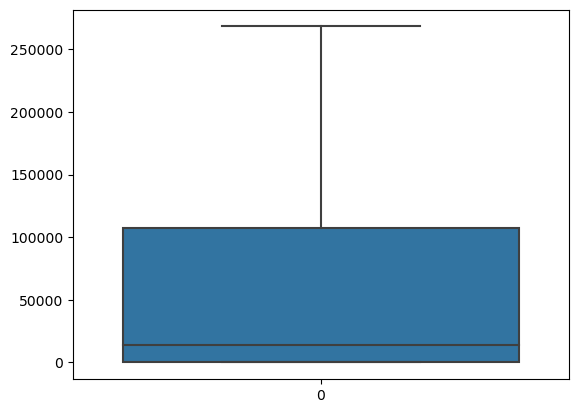

In [29]:
sns.boxplot(data= raw_data.oldbalanceOrg)

<Axes: >

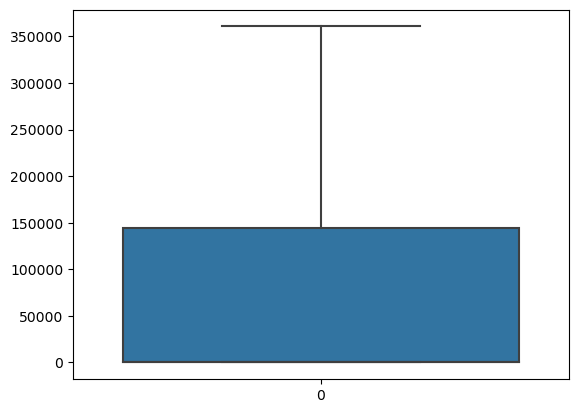

In [14]:
sns.boxplot(data= raw_data.newbalanceOrig)

As we can see remove the outliers by IQR Method

In [15]:
df = raw_data

# 4. Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable
 


In [16]:
Quantitative_Variable = df.select_dtypes(include=[np.number])
Quantitative_Variable.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0


In [17]:
Qualitative_Variable = df.select_dtypes(include='object')
Qualitative_Variable.head(3)

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065


### 4.1Converting qualitative Variable into number

In [30]:
from sklearn.preprocessing import LabelEncoder

Qualitative_Variable = Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head(3)

,type,nameOrig,nameDest
0,3,757869,1662094
1,3,2188998,1733924
2,4,1002156,439685


# 4.2 Combining the data set 

In [31]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,3,757869,1662094
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3,2188998,1733924
2,1,181.00,181.0,0.00,0.0,0.0,1,0,4,1002156,439685
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,5828262,391696
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3,3445981,828919


# 5. Data Partition 

In [39]:
x = Final_combined.drop(['isFraud','isFlaggedFraud'],axis=1)
y = Final_combined['isFraud']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
train = pd.concat([y_train,x_train],axis=1)
train.head()

,isFraud,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,nameOrig,nameDest
2408104,0,202,26771.98000,27521.00,54292.98,2.357592e+06,2779773.125,0,2487575,18776
662430,0,36,344879.65000,0.00,0.00,2.357592e+06,2779773.125,1,1909142,125492
496595,0,20,501719.33875,0.00,0.00,2.357592e+06,2779773.125,4,4401349,317835
5053741,0,354,37739.35000,66684.93,28945.58,0.000000e+00,0.000,3,5203756,604220
755621,0,38,376055.13000,22501.00,0.00,1.823504e+05,558405.550,1,2337985,26843


In [41]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,isFraud,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,nameOrig,nameDest
isFraud,1.000000,0.032020,0.048395,0.046279,-0.021100,-0.013334,-0.000845,0.020974,-0.000461,-0.021912
step,0.032020,1.000000,-0.006639,-0.012901,-0.012971,0.000512,-0.005975,0.006731,-0.000094,0.003673
amount,0.048395,-0.006639,1.000000,0.023494,0.050388,0.412347,0.497765,-0.157472,0.000693,-0.499741
oldbalanceOrg,0.046279,-0.012901,0.023494,1.000000,0.858652,0.105049,0.038212,-0.345756,-0.000357,-0.124662
newbalanceOrig,-0.021100,-0.012971,0.050388,0.858652,1.000000,0.120774,0.016924,-0.494132,-0.000490,-0.166619
oldbalanceDest,-0.013334,0.000512,0.412347,0.105049,0.120774,1.000000,0.966286,-0.288759,-0.000502,-0.439436
newbalanceDest,-0.000845,-0.005975,0.497765,0.038212,0.016924,0.966286,1.000000,-0.206555,-0.000113,-0.452823
type,0.020974,0.006731,-0.157472,-0.345756,-0.494132,-0.288759,-0.206555,1.000000,0.000141,0.584144
nameOrig,-0.000461,-0.000094,0.000693,-0.000357,-0.000490,-0.000502,-0.000113,0.000141,1.000000,-0.000200
nameDest,-0.021912,0.003673,-0.499741,-0.124662,-0.166619,-0.439436,-0.452823,0.584144,-0.000200,1.000000


There is high colinearity between oldbalanceOrg,newbalanceOrig and oldbalanceDest,newbalanceDest

# 5.1 VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = Final_combined.drop(['isFraud'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2,...8
                          index=X1.columns)  # column name
series_before

step               3.071505
amount             3.009364
oldbalanceOrg      6.190176
newbalanceOrig     7.221094
oldbalanceDest    34.207058
newbalanceDest    38.178082
isFlaggedFraud     1.000063
type               5.340225
nameOrig           3.112379
nameDest           4.197161
dtype: float64

As we can see Mulitcolinearity Present 

# 5.2 Convert Imbalanced data to balanced Data by using SMOTE method

<Axes: xlabel='isFraud', ylabel='count'>

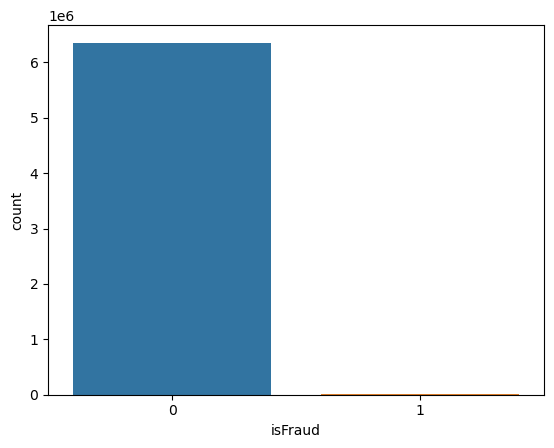

In [43]:
sns.countplot(data = Final_combined ,x='isFraud')

### As we can see our data is  Imbalanced

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_trian_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

In [45]:
Data = pd.concat([x_trian_resampled,y_train_resampled],axis=1)

<Axes: xlabel='isFraud', ylabel='count'>

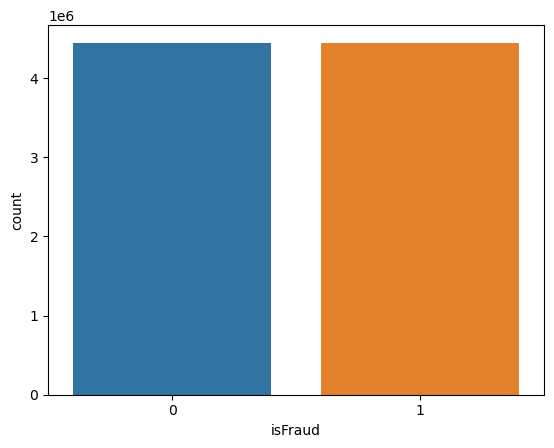

In [46]:
sns.countplot(data=Data,x='isFraud')

As we can see Our data is Balanced

# 6 Model -- Random Forest 

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(random_state=20,
                               n_estimators=25, # make 25 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(x_trian_resampled, y_train_resampled)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=25, random_state=20)

# 6.1 Importance Features

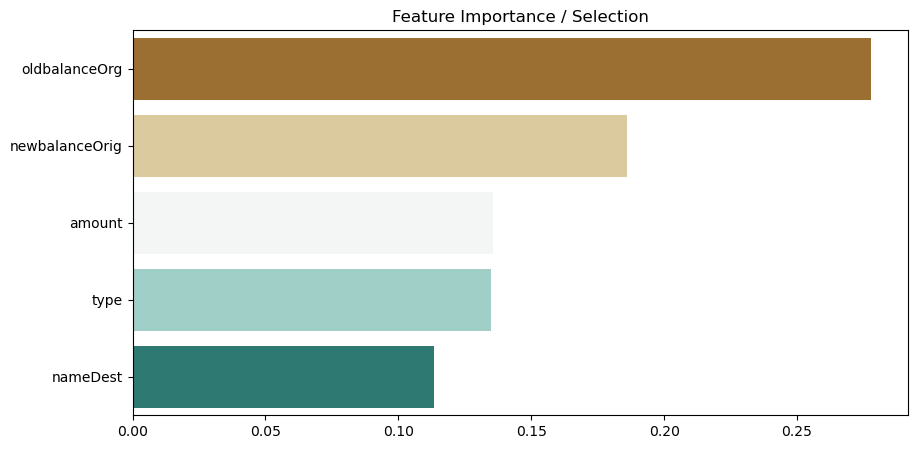

In [48]:
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG", orient='h')

#### Top 5 Variable are    
    * oldbalanceOrg 
    * newbalanceOrig
    * amount
    * type
    * nameDest


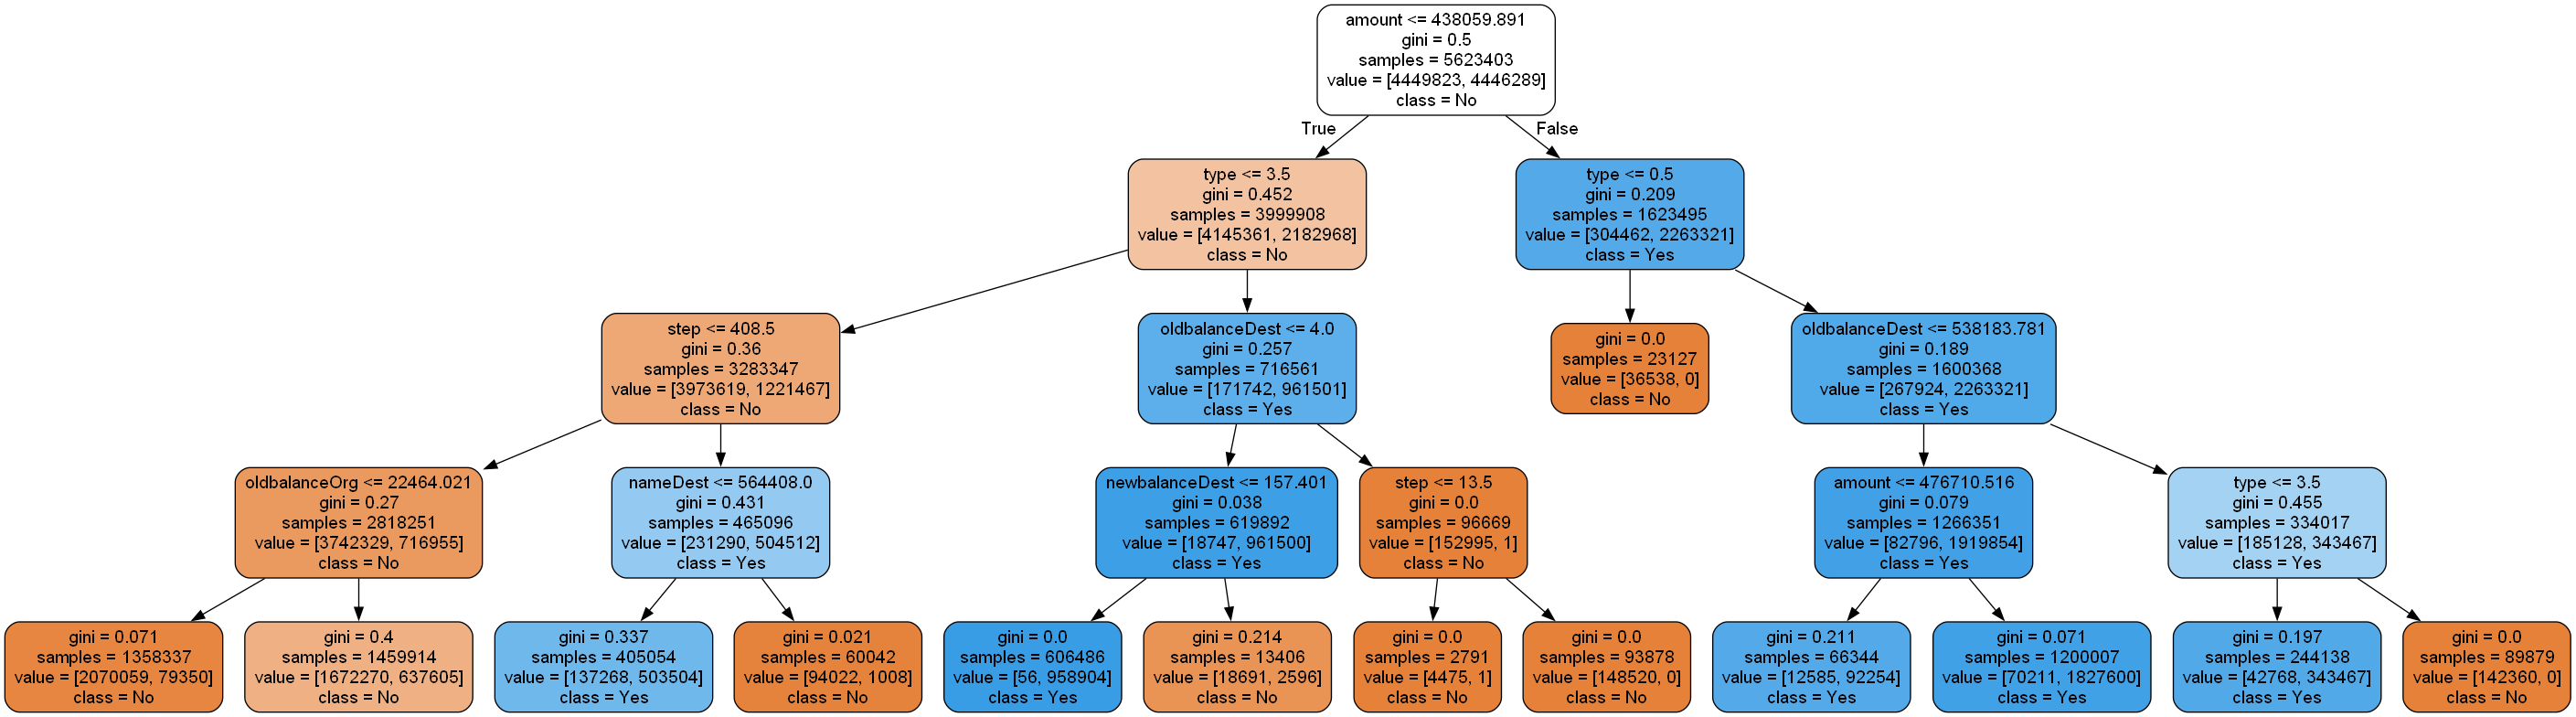

In [51]:
from sklearn.tree import export_graphviz
import pydot

feature_list = list(x.columns)  # all independent variable name
isFraud = ['No','Yes'] 

tree = Model.estimators_[2]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                class_names = isFraud,
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

# 6.2 Prediction on Train Data

In [53]:
Data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,nameOrig,nameDest,isFraud
0,202,26771.98000,27521.00,54292.98,2.357592e+06,2779773.125,0,2487575,18776,0
1,36,344879.65000,0.00,0.00,2.357592e+06,2779773.125,1,1909142,125492,0
2,20,501719.33875,0.00,0.00,2.357592e+06,2779773.125,4,4401349,317835,0
3,354,37739.35000,66684.93,28945.58,0.000000e+00,0.000,3,5203756,604220,0
4,38,376055.13000,22501.00,0.00,1.823504e+05,558405.550,1,2337985,26843,0


In [54]:
Data['Predict'] = Model.predict(x_trian_resampled)

In [55]:
Data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,nameOrig,nameDest,isFraud,Predict
0,202,26771.98000,27521.00,54292.98,2.357592e+06,2779773.125,0,2487575,18776,0,0
1,36,344879.65000,0.00,0.00,2.357592e+06,2779773.125,1,1909142,125492,0,0
2,20,501719.33875,0.00,0.00,2.357592e+06,2779773.125,4,4401349,317835,0,0
3,354,37739.35000,66684.93,28945.58,0.000000e+00,0.000,3,5203756,604220,0,0
4,38,376055.13000,22501.00,0.00,1.823504e+05,558405.550,1,2337985,26843,0,0


# 6.3 Model Performance Metrics

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(Data['Predict'],Data['isFraud'])
print(confusion_matrix)

[[4173925   96314]
 [ 274131 4351742]]


In [58]:
Accuracy_Train = ((4351742+4173925)/(8896112)*100)
print(Accuracy_Train,'%')

95.83587751593056 %


In [84]:
from sklearn.metrics import classification_report
print(classification_report(Data['isFraud'], Data['Predict']))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96   4448056
           1       0.94      0.98      0.96   4448056

    accuracy                           0.96   8896112
   macro avg       0.96      0.96      0.96   8896112
weighted avg       0.96      0.96      0.96   8896112



# Model accuracy is 96%

# 6.4 Predictions on Test Dataset

In [67]:
test = pd.concat([x_test,y_test],axis=1)
train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,nameOrig,nameDest,isFraud,predicted
3737323,278,330218.42000,20866.0000,351084.420,4.524196e+05,122201.150,0,5144186,523341,0,0
264914,15,11647.08000,30370.0000,18722.920,0.000000e+00,0.000,3,868156,1849210,0,0
85647,10,152264.21000,106589.0000,258853.210,2.013030e+05,49038.800,0,2453021,179836,0,0
5899326,403,501719.33875,0.0000,0.000,2.357592e+06,2779773.125,4,4162339,167013,0,0
2544263,206,78172.30000,268287.9375,360646.025,4.158219e+05,337649.600,0,5740614,27202,0,0


In [68]:
test["predicted"] = Model.predict(x_test)
train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,nameOrig,nameDest,isFraud,predicted
3737323,278,330218.42000,20866.0000,351084.420,4.524196e+05,122201.150,0,5144186,523341,0,0
264914,15,11647.08000,30370.0000,18722.920,0.000000e+00,0.000,3,868156,1849210,0,0
85647,10,152264.21000,106589.0000,258853.210,2.013030e+05,49038.800,0,2453021,179836,0,0
5899326,403,501719.33875,0.0000,0.000,2.357592e+06,2779773.125,4,4162339,167013,0,0
2544263,206,78172.30000,268287.9375,360646.025,4.158219e+05,337649.600,0,5740614,27202,0,0


# 6.5 Model Performance metrics on Test Data

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['predicted'],test['isFraud'])
print(confusion_matrix)

[[1789435      88]
 [ 116916    2347]]


In [71]:
Accuracy_Test = ((2347+1789435)/(1908786)*100)
print(Accuracy_Test,'%')

93.87024003738502 %


In [82]:
from sklearn.metrics import classification_report
print(classification_report(test['isFraud'], test['predicted']))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906351
           1       0.02      0.96      0.04      2435

    accuracy                           0.94   1908786
   macro avg       0.51      0.95      0.50   1908786
weighted avg       1.00      0.94      0.97   1908786



# Test Accuracy is 94%

# Finish